# NER Before COVID

## Merging Comments and Submission in a proper format

In [1]:
import pandas as pd
a = pd.read_csv("Green-comments-after2020.csv")
b = pd.read_csv("sustainability-comments-after2020.csv")

In [2]:
merged = pd.concat([a,b],ignore_index=True)
merged.head()

,id,submission_id,body,created_utc,parent_id,permalink
0,ffidx2m,etp02h,Serious question here.... why isn't the CBC ar...,1579971556,t3_etp02h,/r/Green/comments/etp02h/greta_thunberg_brushe...
1,ffizwc8,etp02h,"Never heard of them, but I do note every post ...",1579986861,t1_ffidx2m,/r/Green/comments/etp02h/greta_thunberg_brushe...
2,ffjgg9k,etp02h,So a spammer then.,1579997722,t1_ffizwc8,/r/Green/comments/etp02h/greta_thunberg_brushe...
3,fhcvwgt,euu2k0,"From what I've heard about Teslas, they handle...",1581471961,t3_euu2k0,/r/Green/comments/euu2k0/busting_3_myths_about...
4,ffulzcx,ev66jd,The article notes the environmental devastatio...,1580244778,t3_ev66jd,/r/Green/comments/ev66jd/why_developing_enviro...


In [3]:
df = pd.DataFrame(merged, columns = ["id", "body"])

In [4]:
df.shape

(58057, 2)

In [5]:
df.head()

,id,body
0,ffidx2m,Serious question here.... why isn't the CBC ar...
1,ffizwc8,"Never heard of them, but I do note every post ..."
2,ffjgg9k,So a spammer then.
3,fhcvwgt,"From what I've heard about Teslas, they handle..."
4,ffulzcx,The article notes the environmental devastatio...


In [6]:
df["body"][0]

'Serious question here.... why isn\'t the CBC article being posted? Who the hell is "ecoplanetnews" and why are we sending them ad revenue when CBC did the legwork on this piece?'

In [7]:
df = df.rename(columns={'body': 'content'})

In [8]:
df.head()

,id,content
0,ffidx2m,Serious question here.... why isn't the CBC ar...
1,ffizwc8,"Never heard of them, but I do note every post ..."
2,ffjgg9k,So a spammer then.
3,fhcvwgt,"From what I've heard about Teslas, they handle..."
4,ffulzcx,The article notes the environmental devastatio...


In [9]:
c = pd.read_csv("Green-submission-after2020.csv")
d = pd.read_csv("sustainability-submission-after2020.csv")

In [10]:
merged2 = pd.concat([c,d],ignore_index=True)
merged2.head()

,id,created_utc,title,selftext,full_link
0,etfi0m,1579895174,America’s New Drinking Problem? The Trump Admi...,\n\n[https://www.youtube.com/watch?v=K1eBxEwi...,https://www.reddit.com/r/Green/comments/etfi0m...
1,etouq6,1579945099,Trump’s gutting of environmental rules is push...,NaN,https://www.reddit.com/r/Green/comments/etouq6...
2,etp02h,1579946285,Greta Thunberg brushes off mockery from U.S. f...,NaN,https://www.reddit.com/r/Green/comments/etp02h...
3,etpv53,1579952926,"'It's a crisis, not a change': the six Guardia...",NaN,https://www.reddit.com/r/Green/comments/etpv53...
4,etsaxl,1579967241,The Future will be Worse than We Thought,NaN,https://www.reddit.com/r/Green/comments/etsaxl...


In [11]:
df2 = pd.DataFrame(merged2, columns = ["id","title", "selftext"])
df2.shape

(12412, 3)

In [12]:
import numpy as np
df2['selftext'] = df2['selftext'].replace("[deleted]", "")
df2['selftext'] = df2['selftext'].replace("[removed]", "")
df2['selftext'] = df2['selftext'].replace("<not selftext available>", "")
df2['selftext'] = df2['selftext'].replace(np.nan," ")

In [13]:
df2["content"] = df2["title"] +" "+ df2["selftext"]
df2.head()

,id,title,selftext,content
0,etfi0m,America’s New Drinking Problem? The Trump Admi...,\n\n[https://www.youtube.com/watch?v=K1eBxEwi...,America’s New Drinking Problem? The Trump Admi...
1,etouq6,Trump’s gutting of environmental rules is push...,,Trump’s gutting of environmental rules is push...
2,etp02h,Greta Thunberg brushes off mockery from U.S. f...,,Greta Thunberg brushes off mockery from U.S. f...
3,etpv53,"'It's a crisis, not a change': the six Guardia...",,"'It's a crisis, not a change': the six Guardia..."
4,etsaxl,The Future will be Worse than We Thought,,The Future will be Worse than We Thought


In [14]:
df2["content"][0]

'America’s New Drinking Problem? The Trump Administration Rolls Back the Clean Water Act  \\n\\n[https://www.youtube.com/watch?v=K1eBxEwiqi4&amp;feature=youtu.be](https://www.youtube.com/watch?v=K1eBxEwiqi4&amp;feature=youtu.be)\\n\\nPresident Trump’s EPA just restricted the bodies of water that the federal government can regulate to: the territorial seas and traditional navigable waters, Perennial and intermittent tributaries to those waters, Certain lakes, ponds, and impoundments, and Wetlands adjacent to jurisdictional waters. This unfortunately means that the federal government is no longer enforcing laws over many other waters, including groundwater, wetlands that are not adjacent to large bodies of water, some seasonal streams that flow for only a portion of the year,  and “ephemeral” streams that only flow after rainstorms. Here’s what the means!'

In [15]:
df3 = pd.DataFrame(df2, columns = ["id","content"])

In [16]:
df3.head()

,id,content
0,etfi0m,America’s New Drinking Problem? The Trump Admi...
1,etouq6,Trump’s gutting of environmental rules is push...
2,etp02h,Greta Thunberg brushes off mockery from U.S. f...
3,etpv53,"'It's a crisis, not a change': the six Guardia..."
4,etsaxl,The Future will be Worse than We Thought


In [17]:
merged_final = pd.concat([df,df3],ignore_index=True)
print(merged_final.shape)
merged_final.head()

(70469, 2)


,id,content
0,ffidx2m,Serious question here.... why isn't the CBC ar...
1,ffizwc8,"Never heard of them, but I do note every post ..."
2,ffjgg9k,So a spammer then.
3,fhcvwgt,"From what I've heard about Teslas, they handle..."
4,ffulzcx,The article notes the environmental devastatio...


In [18]:
dfx = merged_final.copy()

## Data Cleaning

In [19]:
from pandas_profiling import ProfileReport

In [20]:
profile = ProfileReport(dfx, title="Pandas Profiling Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
dfx.shape

(70469, 2)

In [20]:
df1 = dfx.copy()

In [21]:
df1 = df1.rename(columns={'content':'body'})

In [22]:
df1 = df1.loc[df1["body"] != "[deleted]"]
df1.shape

(69559, 2)

In [23]:
df1 = df1.loc[df1["body"] != "[removed]"]
df1.shape

(68711, 2)

In [24]:
df1 = df1.loc[df1["body"] != "Sorry, your submission has been automatically removed. Account age too young, spam likely.\\n\\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/Green) if you have any questions or concerns.*"]
df1.shape

(68608, 2)

In [25]:
df1 = df1.loc[df1["body"] != "Sorry, your submission has been automatically removed. Not enough comment karma, spam likely.\\n\\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/Green) if you have any questions or concerns.*"]
df1.shape

(68549, 2)

In [26]:
df1 = df1.loc[df1["body"] != "Thank you!"]
df1.shape

(68502, 2)

In [27]:
df1 = df1.loc[df1["body"] != '!emissionsbot']
df1.shape

(68502, 2)

In [28]:
df1 = df1.loc[df1["body"] != 'Thank you']
df1.shape

(68489, 2)

In [29]:
df1 = df1.loc[df1["body"] != 'Thank you.']
df1.shape

(68481, 2)

In [30]:
df1 = df1.loc[df1["body"] != '/r/careerguidance']
df1.shape

(68481, 2)

In [31]:
df1 = df1.loc[df1["body"] != 'Thanks!']
df1.shape

(68451, 2)

In [32]:
df1 = df1.loc[df1["body"] != 'No']
df1.shape

(68435, 2)

In [33]:
df1 = df1.loc[df1["body"] != 'Lol']
df1.shape

(68430, 2)

In [34]:
df1 = df1.loc[df1["body"] != 'No.']
df1.shape

(68416, 2)

In [35]:
df1 = df1.loc[df1["body"] != 'Source?']
df1.shape

(68410, 2)

In [36]:
df1 = df1.loc[df1["body"] != 'x-post: /r/EnviroNews']
df1.shape

(68410, 2)

In [37]:
df1 = df1.loc[df1["body"] != 'Thank you!!!']
df1.shape

(68407, 2)

In [38]:
df1 = df1.loc[df1["body"] != '?']
df1.shape

(68402, 2)

In [39]:
df1 = df1.loc[df1["body"] != 'Thanks']
df1.shape

(68390, 2)

In [40]:
df1 = df1.loc[df1["body"] != 'Yes']
df1.shape

(68378, 2)

In [41]:
df1 = df1.loc[df1["body"] != 'Yes.']
df1.shape

(68366, 2)

In [42]:
df1 = df1.loc[df1["body"] != 'Thank you!!']
df1.shape

(68358, 2)

In [43]:
df1 = df1.loc[df1["body"] != ':(']
df1.shape

(68356, 2)

In [44]:
df1 = df1.loc[df1["body"] != '/r/Green does not allow image submissions.\\n\\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/Green) if you have any questions or concerns.*']
df1.shape

(68342, 2)

In [45]:
df1 = df1.loc[df1["body"] != 'Green  ']
df1.shape

(68324, 2)

In [46]:
# most frequent value in a pandas column
df1["body"].value_counts().idxmax()

'Agreed'

In [47]:
df1 = df1.loc[df1["body"] != 'Agreed']
df1.shape

(68311, 2)

In [48]:
df1 = df1.loc[df1["body"] != 'This']
df1.shape

(68302, 2)

In [49]:
df1 = df1.loc[df1["body"] != 'Good bot']
df1.shape

(68293, 2)

In [50]:
df1 = df1.loc[df1["body"] != ':)']
df1.shape

(68285, 2)

In [51]:
df1 = df1.loc[df1["body"] != 'This!']
df1.shape

(68278, 2)

In [52]:
df1 = df1.loc[df1["body"] != 'thanks!']
df1.shape

(68270, 2)

In [53]:
df1 = df1.loc[df1["body"] != 'Thank you so much!']
df1.shape

(68261, 2)

In [54]:
df1 = df1.loc[df1["body"] != 'Why?']
df1.shape

(68253, 2)

In [55]:
# most frequent value in a pandas column
df1["body"].value_counts().idxmax()

'Thanks again for your input on this. My article has now been published if you want to check it out: https://medium.com/age-of-awareness/what-can-i-do-about-the-state-of-the-world-d678ec80478b or you can read it on my website: https://faronsage.org/posts/what-can-i-do-about-the-state-of-the-world'

In [56]:
df1 = df1.loc[df1["body"] != 'Thanks again for your input on this. My article has now been published if you want to check it out: https://medium.com/age-of-awareness/what-can-i-do-about-the-state-of-the-world-d678ec80478b or you can read it on my website: https://faronsage.org/posts/what-can-i-do-about-the-state-of-the-world']
df1.shape

(68242, 2)

In [57]:
df1 = df1.loc[df1["body"] != 'Our subreddit will be moving over to r/projectgreenhouse. Please come join us there!']
df1.shape

(68232, 2)

In [58]:
df1 = df1.loc[df1["body"] != 'What?']
df1.shape

(68225, 2)

In [70]:
profile2 = ProfileReport(df1, title="Pandas Profiling Report", explorative=True)
profile2

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [59]:
df = df1.copy()
df.shape

(68225, 2)

## Text Cleaning

In [60]:
import neattext.functions as nfx

In [61]:
df = df.dropna()

In [62]:
df= df.replace(r'\n',' ', regex=True)

In [63]:
df = df.replace(r'\\n',' ', regex=True)

In [64]:
df = df.replace(r'/r/',' ', regex=True)

In [65]:
df.head()

,id,body
0,ffidx2m,Serious question here.... why isn't the CBC ar...
1,ffizwc8,"Never heard of them, but I do note every post ..."
2,ffjgg9k,So a spammer then.
3,fhcvwgt,"From what I've heard about Teslas, they handle..."
4,ffulzcx,The article notes the environmental devastatio...


In [66]:
slang_dict = {
"AFAIK": "As Far As I Know",
"AFK": "Away From Keyboard",
"ASAP": "As Soon As Possible",
"ATK": "At The Keyboard",
"ATM": "At The Moment",
"A3": "Anytime, Anywhere, Anyplace",
"BAK": "Back At Keyboard",
"BBL": "Be Back Later",
"BBS": "Be Back Soon",
"BFN": "Bye For Now",
"B4N": "Bye For Now",
"BRB": "Be Right Back",
"BRT": "Be Right There",
"BTW": "By The Way",
"B4": "Before",
"B4N": "Bye For Now",
"CU": "See You",
"CUL8R": "See You Later",
"CYA": "See You",
"FAQ": "Frequently Asked Questions",
"FC": "Fingers Crossed",
"FWIW": "For What It's Worth",
"FYI": "For Your Information",
"GAL": "Get A Life",
"GG": "Good Game",
"GN": "Good Night",
"GMTA": "Great Minds Think Alike",
"GR8": "Great!",
"G9": "Genius",
"OMG": "Surprised",
"IC": "I See",
"ICQ": "I Seek you (also a chat program)",
"ILU": "ILU: I Love You",
"IMHO": "In My Honest / Humble Opinion",
"IMO": "In My Opinion",
"IOW": "In Other Words",
"IRL": "In Real Life",
"KISS": "Keep It Simple, Stupid",
"LDR": "Long Distance Relationship",
"LMAO": "Laugh My Ass Off",
"LOL": "Laughing Out Loud",
"LTNS": "Long Time No See",
"L8R": "Later",
"MTE": "My Thoughts Exactly",
"M8": "Mate",
"NRN": "No Reply Necessary",
"OIC": "Oh I See",
"PITA": "Pain In The Ass",
"PRT": "Party",
"PRW": "Parents Are Watching",
"ROFL": "Rolling On The Floor Laughing",
"ROFLOL": "Rolling On The Floor Laughing Out Loud",
"ROTFLMAO": "Rolling On The Floor Laughing My Ass Off",
"SK8": "Skate",
"STATS": "Your sex and age",
"ASL": "Age, Sex, Location",
"THX": "Thank You",
"TTFN": "Ta-Ta For Now!",
"TTYL": "Talk To You Later",
"U2": "You Too",
"U4E": "Yours For Ever",
"WB": "Welcome Back",
"WTF": "What The Fuck",
"WTG": "Way To Go!",
"WUF": "Where Are You From?",
"W8": "Wait"
}

In [67]:
def slang(x):
    if type(x) is str:
        for key in slang_dict:
            value = slang_dict[key]
            x = x.replace(key,value)
        return x
    else:
        return x

In [68]:
# EXAMPLE
slang("Hey Rishabh BRB !!")

'Hey Rishabh Be Right Back !!'

In [69]:
df["SLANG-ext"] =df["body"].apply(lambda x: slang(x))

In [70]:
contractions_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"here's": "here is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [71]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions_dict:
            value = contractions_dict[key]
            x = x.lower().replace(key,value)
        return x
    else:
        return x

In [72]:
# EXAMPLE
cont_to_exp("what's the best way to ensure this?")

'what has / what is the best way to ensure this?'

In [73]:
df["Cont-Exp"] =df["SLANG-ext"].apply(lambda x: cont_to_exp(x))

In [74]:
def preprocess(df):
    
    df= df.apply(nfx.remove_urls)
    df= df.apply(nfx.remove_special_characters)
    df= df.apply(nfx.remove_emojis)
    df= df.apply(nfx.remove_numbers)
    df= df.apply(nfx.remove_puncts)
    df= df.apply(nfx.remove_hashtags)
    df= df.apply(nfx.remove_currencies)
    df= df.apply(lambda x: x.lower())
    df= df.apply(nfx.remove_multiple_spaces)
    df= df.apply(nfx.remove_stopwords)
    
    return df

In [75]:
df["final"] =[each for each in preprocess(df["Cont-Exp"])]
df.head()

,id,body,SLANG-ext,Cont-Exp,final
0,ffidx2m,Serious question here.... why isn't the CBC ar...,Serious question here.... why isn't the CBC ar...,serious question here.... why is not the cbc a...,question cbc article posted hell ecoplanetnews...
1,ffizwc8,"Never heard of them, but I do note every post ...","Never heard of them, but I do note every post ...","never heard of them, but i do note every post ...",heard note post umycojohn link dozen
2,ffjgg9k,So a spammer then.,So a spammer then.,so a spammer then.,spammer
3,fhcvwgt,"From what I've heard about Teslas, they handle...","From what I've heard about Teslas, they handle...","from what i have heard about teslas, they hand...",heard teslas handle fast charging better shown...
4,ffulzcx,The article notes the environmental devastatio...,The article notes the environmental devastatio...,the article notes the environmental devastatio...,article notes environmental devastation lithiu...


In [76]:
new = pd.DataFrame(df, columns = ["id","final"])

In [77]:
#export to csv
new.to_csv( "Clean_Data_After_Covid.csv", index=False, encoding='utf-8-sig')

## Named Entity Recognition

### SPACY

In [89]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [90]:
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

In [91]:
ent=new["final"].apply(lambda x : ner(x))

ent=[x for sub in ent for x in sub]

In [92]:
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

In [93]:
counter=Counter(ent)
count=counter.most_common()

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

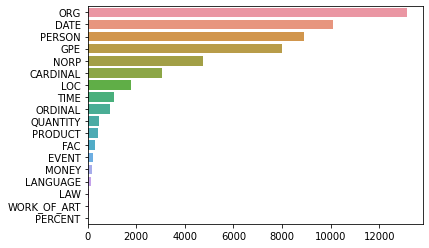

In [95]:
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)

#### NER for Organizations

In [97]:
def ner(text,ent="ORG"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

In [98]:
org=new["final"].apply(lambda x: ner(x))
org=[i for x in org for i in x]


C:\Users\Naim Cavin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

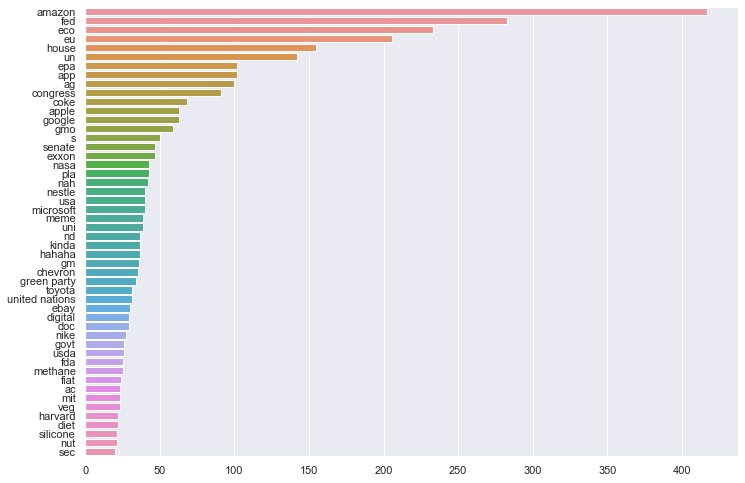

In [99]:
counter=Counter(org)
x,y=map(list,zip(*counter.most_common(50)))
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y,x)

In [100]:
org = [i for i in org if i != "nah"]
org = [i for i in org if i != "kinda"]

In [101]:
org = [i for i in org if i != "green party"]
org = [i for i in org if i != "gmo"]
org = [i for i in org if i != "eco"]
org = [i for i in org if i != "un"]
org = [i for i in org if i != "congress"]
org = [i for i in org if i != "house"]
org = [i for i in org if i != "epa"]
org = [i for i in org if i != "eu"]
org = [i for i in org if i != "senate"]
org = [i for i in org if i != "gop"]
org = [i for i in org if i != "white house"]
org = [i for i in org if i != "digital"]
org = [i for i in org if i != "harvard"]
org = [i for i in org if i != "supreme court"]
org = [i for i in org if i != "app"]
org = [i for i in org if i != "nut"]
org = [i for i in org if i != "trump administration"]

C:\Users\Naim Cavin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

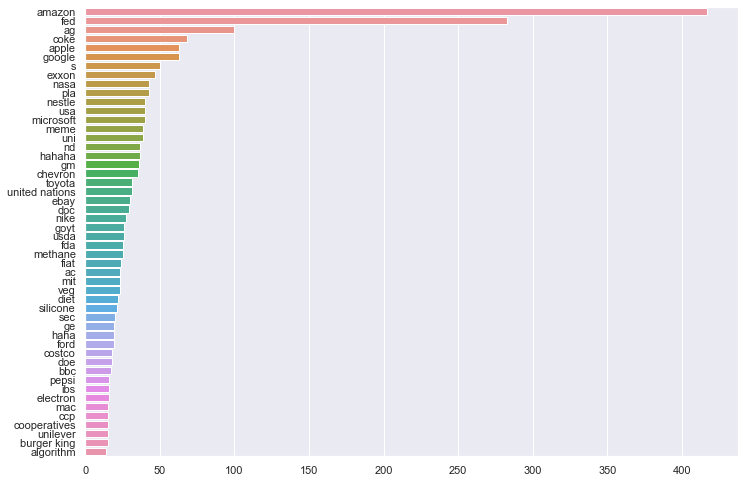

In [102]:
counter=Counter(org)
x,y=map(list,zip(*counter.most_common(50)))
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y,x)

In [103]:
org = [i for i in org if i != "fed"]
org = [i for i in org if i != "stein"]
org = [i for i in org if i != "ag"]
org = [i for i in org if i != "uni"]
org = [i for i in org if i != "fda"]
org = [i for i in org if i != "mit"]
org = [i for i in org if i != "united nations"]
org = [i for i in org if i != "eta"]
org = [i for i in org if i != "karma"]
org = [i for i in org if i != "cbc"]
org = [i for i in org if i != "cnn"]
org = [i for i in org if i != "coke"]
org = [i for i in org if i != "bbc"]
org = [i for i in org if i != "tupperware"]
org = [i for i in org if i != "usa"]
org = [i for i in org if i != "uk"]
org = [i for i in org if i != "usda"]
org = [i for i in org if i != "methane"]
org = [i for i in org if i != "npr"]
org = [i for i in org if i != "hahaha"]
org = [i for i in org if i != "meme"]
org = [i for i in org if i != "nd"]
org = [i for i in org if i != "veg"]
org = [i for i in org if i != "dnc"]
org = [i for i in org if i != "ga"]
org = [i for i in org if i != "dnc"]
org = [i for i in org if i != "doe"]
org = [i for i in org if i != "silicone"]
org = [i for i in org if i != "sierra club"]
org = [i for i in org if i != "phd"]
org = [i for i in org if i != "ems"]

C:\Users\Naim Cavin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

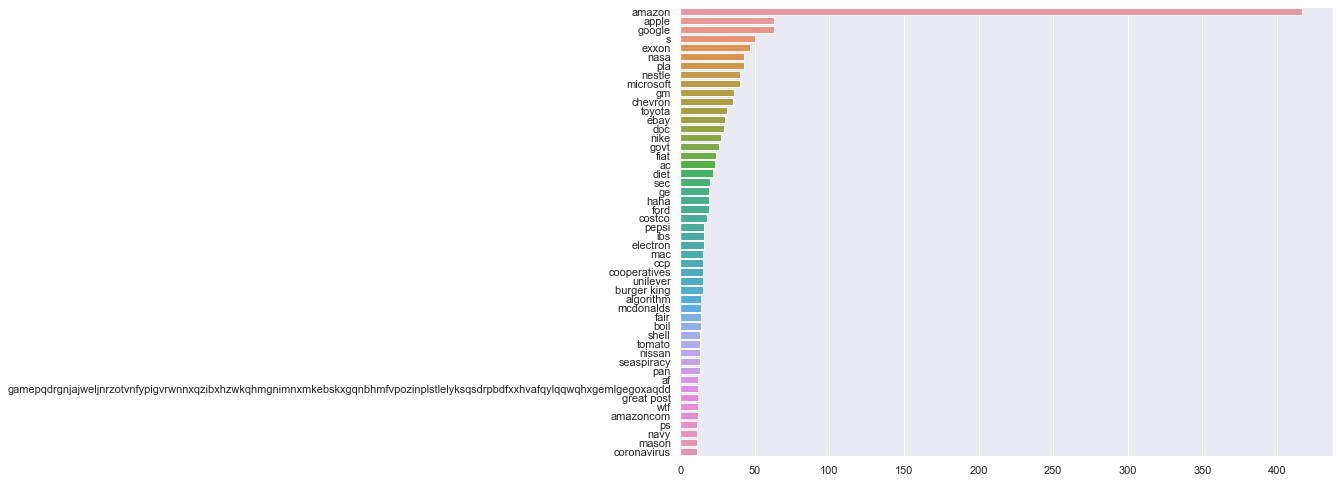

In [104]:
counter=Counter(org)
x,y=map(list,zip(*counter.most_common(50)))
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y,x)

In [110]:
org = [i for i in org if i != "sun"]
org = [i for i in org if i != "acc"]
org = [i for i in org if i != "democratic party"]
org = [i for i in org if i != "govt"]
org = [i for i in org if i != "nyc"]
org = [i for i in org if i != "rd party"]
org = [i for i in org if i != "s"]
org = [i for i in org if i != "copd"]
org = [i for i in org if i != "tomato"]
org = [i for i in org if i != "journal"]
org = [i for i in org if i != "biodiesel"]
org = [i for i in org if i != "boil"]
org = [i for i in org if i != "pentagon"]
org = [i for i in org if i != "iea"]
org = [i for i in org if i != "tpp"]
org = [i for i in org if i != "nec"]
org = [i for i in org if i != "fibre"]
org = [i for i in org if i != "bum"]
org = [i for i in org if i != "pla"]
org = [i for i in org if i != "new york times"]
org = [i for i in org if i != "doc"]
org = [i for i in org if i != "columbia"]
org = [i for i in org if i != "dea"]
org = [i for i in org if i != "globe"]
org = [i for i in org if i != "diet"]
org = [i for i in org if i !='gamepqdrgnjajweljnrzotvnfypigvrwnnxqzibxhzwkqhmgnimnxmkebskxgqnbhmfvpozinplstlelyksqsdrpbdfxxhvafqylqqwqhxgemlgegoxaqdd']

C:\Users\Naim Cavin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

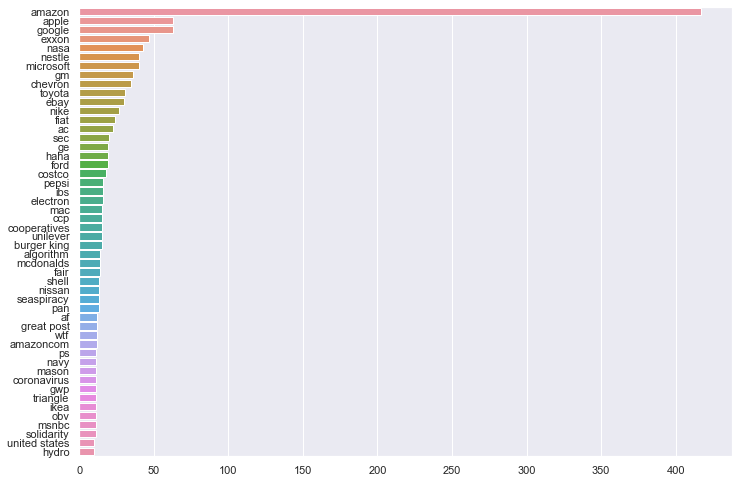

In [112]:
counter=Counter(org)
x,y=map(list,zip(*counter.most_common(50)))
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y,x)

In [117]:
org = [i for i in org if i != "ac"]
org = [i for i in org if i != "sec"]
org = [i for i in org if i != "haha"]
org = [i for i in org if i != "electron"]
org = [i for i in org if i != "ibs"]
org = [i for i in org if i != "ccp"]
org = [i for i in org if i != "mac"]
org = [i for i in org if i != "cooperatives"]
org = [i for i in org if i != "algorithm"]
org = [i for i in org if i != "fair"]
org = [i for i in org if i != "seaspiracy"]
org = [i for i in org if i != "pan"]
org = [i for i in org if i != "nasa"]

C:\Users\Naim Cavin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

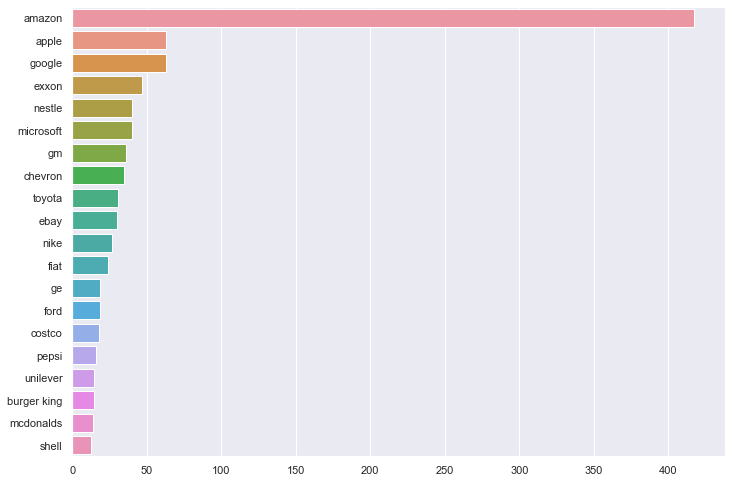

In [118]:
counter=Counter(org)
x,y=map(list,zip(*counter.most_common(20)))
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y,x)

In [119]:
a = pd.DataFrame(data={'A': counter.most_common(50)})

In [121]:
a.head(20)

,A
0,"(amazon, 417)"
1,"(apple, 63)"
2,"(google, 63)"
3,"(exxon, 47)"
4,"(nestle, 40)"
5,"(microsoft, 40)"
6,"(gm, 36)"
7,"(chevron, 35)"
8,"(toyota, 31)"
9,"(ebay, 30)"


In [109]:
a["A"][42]

('gamepqdrgnjajweljnrzotvnfypigvrwnnxqzibxhzwkqhmgnimnxmkebskxgqnbhmfvpozinplstlelyksqsdrpbdfxxhvafqylqqwqhxgemlgegoxaqdd',
 12)